
# Project: GapMinder World Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

GapMinder world is a collection of informations about how people lives in their countries and the levels of all life categories among diffrent countries in the world.

This project will investigate some indicators:
1. Life expectancy years : The average years a new born would live if current mortality pattern stay same.
2. Population density per square kilometers
3. Education aid given for a person
4. Income per person in US dollar
5. Total health spending per person :The average health expenditure per person expressed in US dollar .
6. Child mortality :Death of children under 5 years per 1000 birth.

Questions to investigate:
1. Does spending more money on the health per person increase the life expectancy for the person?
2. The Relation between health spent per person and child mortality:
3. Does increasing the population density in countries affect the education aig given to a person ?
4. Does the population density affect the income per person?
5. what is the higher income per person in 2007?

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

### General Properties

loading the dataframes from the data files

In [7]:
life_df = pd.read_csv('life_expectancy_years.csv')
life_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9


In [8]:
pop_den_df = pd.read_csv('population_density_per_square_km.csv')
educ_df=pd.read_csv('education_aid_given_percent_of_aid.csv')
child_df = pd.read_csv('child_mortality_0_5_year_olds_dying_per_1000_born.csv')
income_df= pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
health_df= pd.read_csv('total_health_spending_per_person_us.csv')

Reshaping the data to be indexed by country and year

In [9]:
"""The melt function takes data in wide format and stacks a set of columns into a single column of data """

life= life_df.melt(id_vars ='country' , var_name ='year' , value_name = 'life').set_index(['country' , 'year'])
pop_den= pop_den_df.melt(id_vars ='country' , var_name ='year' , value_name = 'population_density').set_index(['country' , 'year'])
education= educ_df.melt(id_vars ='country' , var_name ='year' , value_name = 'education').set_index(['country' , 'year'])
child= child_df.melt(id_vars ='country' , var_name ='year' , value_name = 'child').set_index(['country' , 'year'])
income= income_df.melt(id_vars ='country' , var_name ='year' , value_name = 'income_per_person').set_index(['country' , 'year'])
health= health_df.melt(id_vars ='country' , var_name ='year' , value_name = 'health_spent_person').set_index(['country' , 'year'])

In [10]:
health.head()

,,health_spent_person
country,year,
Afghanistan,1995,NaN
Albania,1995,27.9
Algeria,1995,62.1
Andorra,1995,1390.0
Angola,1995,15.6


collecting all the datas in one data frame with the same multi-index (country and year)
only concatinate the mutable data

In [11]:
df=pd.concat([life , pop_den , education , child , income , health] , axis=1 , ignore_index=False , join = 'inner')
df.head()

life  population_density  education  child  income_per_person  \
country   year                                                                  
Australia 1995  78.2                2.34      0.291   7.01              30400   
          1996  78.3                2.37      0.294   6.77              31200   
          1997  78.6                2.39      0.280   6.59              32100   
          1998  78.9                2.42      0.283   6.45              33200   
          1999  79.3                2.45      0.275   6.31              34500   

                health_spent_person  
country   year                       
Australia 1995               1570.0  
          1996               1760.0  
          1997               1760.0  
          1998               1590.0  
          1999               1750.0

In [12]:
df.shape

(286, 6)

In [13]:
df.describe()

,life,population_density,education,child,income_per_person,health_spent_person
count,286.000000,286.000000,279.000000,286.000000,286.000000,286.000000
mean,78.784615,134.986259,0.194820,5.710874,39284.265734,2815.842657
std,1.480579,126.282781,0.121757,1.288362,12226.772350,1358.001566
min,75.300000,2.340000,0.015800,3.320000,21200.000000,874.000000
25%,77.800000,21.700000,0.103000,4.770000,32525.000000,1842.500000
50%,78.800000,103.500000,0.162000,5.590000,37000.000000,2590.000000
75%,79.775000,194.000000,0.258500,6.457500,42500.000000,3597.500000
max,82.800000,490.000000,0.582000,9.740000,97900.000000,7630.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 286 entries, (Australia, 1995) to (United States, 2007)
Data columns (total 6 columns):
life                   286 non-null float64
population_density     286 non-null float64
education              279 non-null float64
child                  286 non-null float64
income_per_person      286 non-null int64
health_spent_person    286 non-null float64
dtypes: float64(5), int64(1)
memory usage: 14.3+ KB


### Modifing the empty data in education aid given with the mean value

In [15]:
df=df.fillna(df.mean())

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 286 entries, (Australia, 1995) to (United States, 2007)
Data columns (total 6 columns):
life                   286 non-null float64
population_density     286 non-null float64
education              286 non-null float64
child                  286 non-null float64
income_per_person      286 non-null int64
health_spent_person    286 non-null float64
dtypes: float64(5), int64(1)
memory usage: 14.3+ KB


now all the data is clean and ready to be visualized

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : Does spending more money on the health per person increase the life expectancy for the person?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fddd8b5cc50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fddd5efdb70>]], dtype=object)

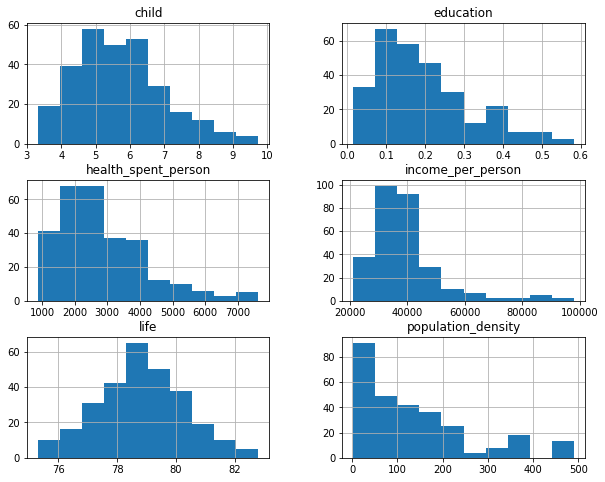

In [17]:
df.hist(figsize=(10,8))

In [18]:
df.tail()

life  population_density  education  child  \
country       year                                               
United States 2003  77.2                31.7     0.0234   8.14   
              2004  77.5                32.0     0.0321   8.05   
              2005  77.6                32.2     0.0367   7.96   
              2006  77.8                32.6     0.0283   7.86   
              2007  78.0                32.9     0.0452   7.75   

                    income_per_person  health_spent_person  
country       year                                          
United States 2003              46900               5980.0  
              2004              48300               6330.0  
              2005              49500               6700.0  
              2006              50400               7070.0  
              2007              50900               7440.0

<function matplotlib.pyplot.show(*args, **kw)>

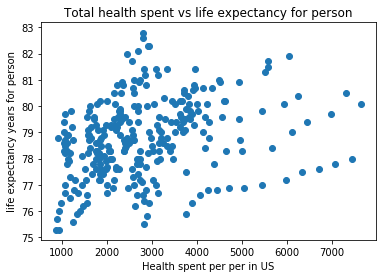

In [19]:
plt.scatter(df['health_spent_person'],df['life'])
plt.title('Total health spent vs life expectancy for person')
plt.xlabel('Health spent per per in US')
plt.ylabel('life expectancy years for person')
plt.show

The graph shows positive correlation between the total health spent per person and the life expectancy years per person.

#  Research Question 2 : The Relation between health spent per person and child mortality:

<function matplotlib.pyplot.show(*args, **kw)>

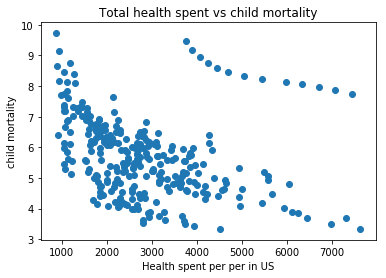

In [20]:
plt.scatter(df['health_spent_person'],df['child'])
plt.title('Total health spent vs child mortality')
plt.xlabel('Health spent per per in US')
plt.ylabel('child mortality')
plt.show

The graph shows a negative correlation between health expenditure per person and  death of children under 5 years

# Research Question 3  Does increasing the population density in countries affect the education aid given to a person ?

<function matplotlib.pyplot.show(*args, **kw)>

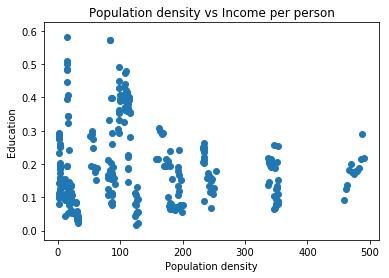

In [21]:
plt.scatter(df['population_density'],df['education'])
plt.title('Population density vs Income per person')
plt.xlabel('Population density')
plt.ylabel('Education')
plt.show


In [22]:
np.corrcoef(df['population_density'], df['education'])

array([[ 1.        , -0.09630788],
       [-0.09630788,  1.        ]])

The relation between population density and education aid given to a person shows negative correlation

# Question 4: Does the population density affect the income per person?

<function matplotlib.pyplot.show(*args, **kw)>

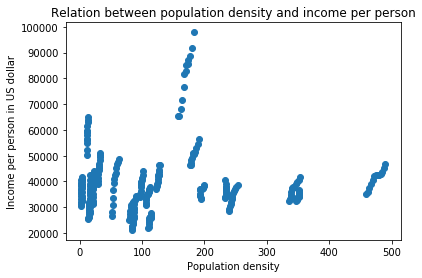

In [23]:
plt.scatter(df['population_density'],df['income_per_person'])
plt.title('Relation between population density and income per person')
plt.xlabel('Population density')
plt.ylabel('Income per person in US dollar')
plt.show

In [24]:
np.corrcoef(df['population_density'], df['income_per_person'])

array([[ 1.        ,  0.04531704],
       [ 0.04531704,  1.        ]])

The graph shows no remarkable relation between population density and the income per person

# Question 5: what is the higher income per person in 2007

Get a dataframe for income per person in year 2007 only

In [25]:
y_income = df.query('year == "2007"').income_per_person
y_income

country         year
Australia       2007    40700
Austria         2007    43900
Belgium         2007    41600
Canada          2007    41600
Denmark         2007    46400
Finland         2007    42500
France          2007    37700
Germany         2007    40500
Greece          2007    32100
Ireland         2007    48700
Italy           2007    38600
Japan           2007    36700
Luxembourg      2007    97900
Netherlands     2007    46900
New Zealand     2007    33100
Norway          2007    65100
Portugal        2007    27600
Spain           2007    34300
Sweden          2007    44100
Switzerland     2007    56300
United Kingdom  2007    38500
United States   2007    50900
Name: income_per_person, dtype: int64

The list of countries

In [26]:
x= y_income.index.get_level_values(0)

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(x , y_income)
plt.title('Income per person in year 2007', fontsize=15, color='darkred', weight='bold')
plt.xlabel('country')
plt.xticks(rotation=45)
plt.ylabel('income per person')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

maximum and minimum incom in 2007

In [23]:
y_income.max()

97900

In [24]:
y_income.min()

27600

# Limitation
The challenge I really faced in the coding of this projects are:

1. Choosing the proper data to handle it, and to make relations between different data among different countries.

2. I had a terrible in collecting all the data in a proper dataframe and make the country and year as indicies for all the      indicators, first I concatinated all the data without indexing but it gived me a huge dataframe without specific indicator  values, then I tried melt function to reshape each indicator with the same indecies, then cocatinat the mutable data together. 


<a id='conclusions'></a>
## Conclusions

1. The health expenditure per person and life expectancy year graph shows a positive correlation.
2. The higer health expenditure per person, the lower death of children under 5 years (negative correlation).
3. The higer country in the income per person is Luxemburg with 97900 US dollars.
4. The minimum country in the income per person is portugal with 27600 US dollars.



In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0